In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
#loading the dataset
df = pd.read_csv('/content/car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [141]:
df.shape

(112, 2)

In [142]:
#checking any null values
df.isna().sum()

Year     0
Price    0
dtype: int64

In [143]:
corr_matrix = df.corr()

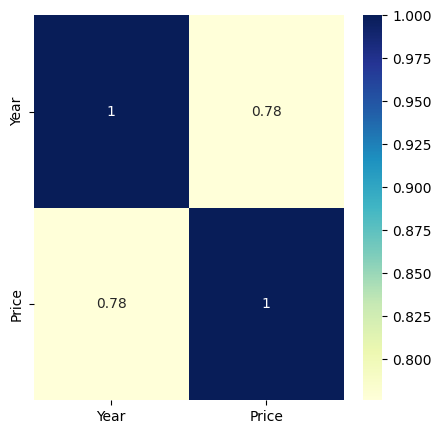

In [144]:
plt.figure(figsize = (5,5))
sns.heatmap(corr_matrix,annot = True, cmap = 'YlGnBu')
plt.show()

In [145]:
x = df.drop('Price',axis = 1 )

In [146]:
y = df['Price']
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
#apply train-test split to divide the dataset into two parts, one for training and another for testing.
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [149]:
# Apply Linear Regression Model
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
model = lin_regressor.fit(x_train,y_train)

In [150]:
#prediction on the test set
predictions = model.predict(x_test)

In [151]:
# calculating Mean Squared Error and R2 value
from sklearn.metrics import mean_squared_error,r2_score
print('MSE = ',mean_squared_error(y_test,predictions))
print('R squared value = ',r2_score(y_test,predictions))

MSE =  4752040909.62874
R squared value =  0.5076091443930695


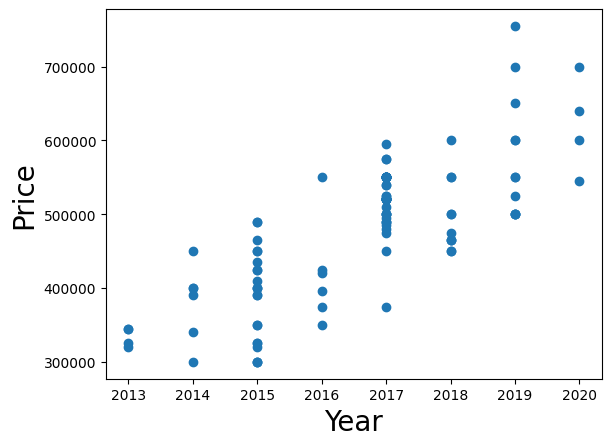

In [152]:
#scatter plotting the relation between variables

plt.scatter(x,y)
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('Price', fontsize = 20)
 
plt.show()

In [153]:
import statsmodels.api as sm

In [154]:
x1 = sm.add_constant(x)

In [155]:
results = sm.OLS(y,x1).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     166.8
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           8.76e-24
Time:                        14:16:55   Log-Likelihood:                -1385.9
No. Observations:                 112   AIC:                             2776.
Df Residuals:                     110   BIC:                             2781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.715e+07   6.78e+06    -12.845      0.000   -1.01e+08   -7.37e+07
Year        4.345e+04   3364.231     12.916      0.000    3.68e+04    5.01e+04
==============================================================================
Omnibus:                        0.903   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.637   Jarque-Bera (JB):                1.012
Skew:                          -0.163   Prob(JB):                        0.603
Kurtosis:                       2.667   Cond. No.                     2.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

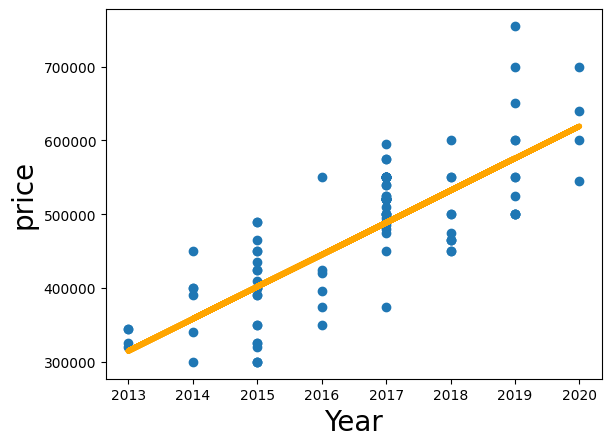

In [156]:
#Visualization on test set
plt.scatter(x,y)
 
yhat = 4.345e+04*x + -8.715e+07
 
fig = plt.plot(x,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Year', fontsize = 20)
 
plt.ylabel('price', fontsize = 20)
 
plt.show()

In [157]:
#predicting the price of car for the year 2022
yhat = 4.345e+04*2022 + -8.715e+07
yhat

705900.0